In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt


In [ ]:

example_file = "disco.00001.wav"

In [ ]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)


In [ ]:
print(signal)


[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [ ]:
print(sample_rate)


22050


In [ ]:
FIG_SIZE = (16,8)

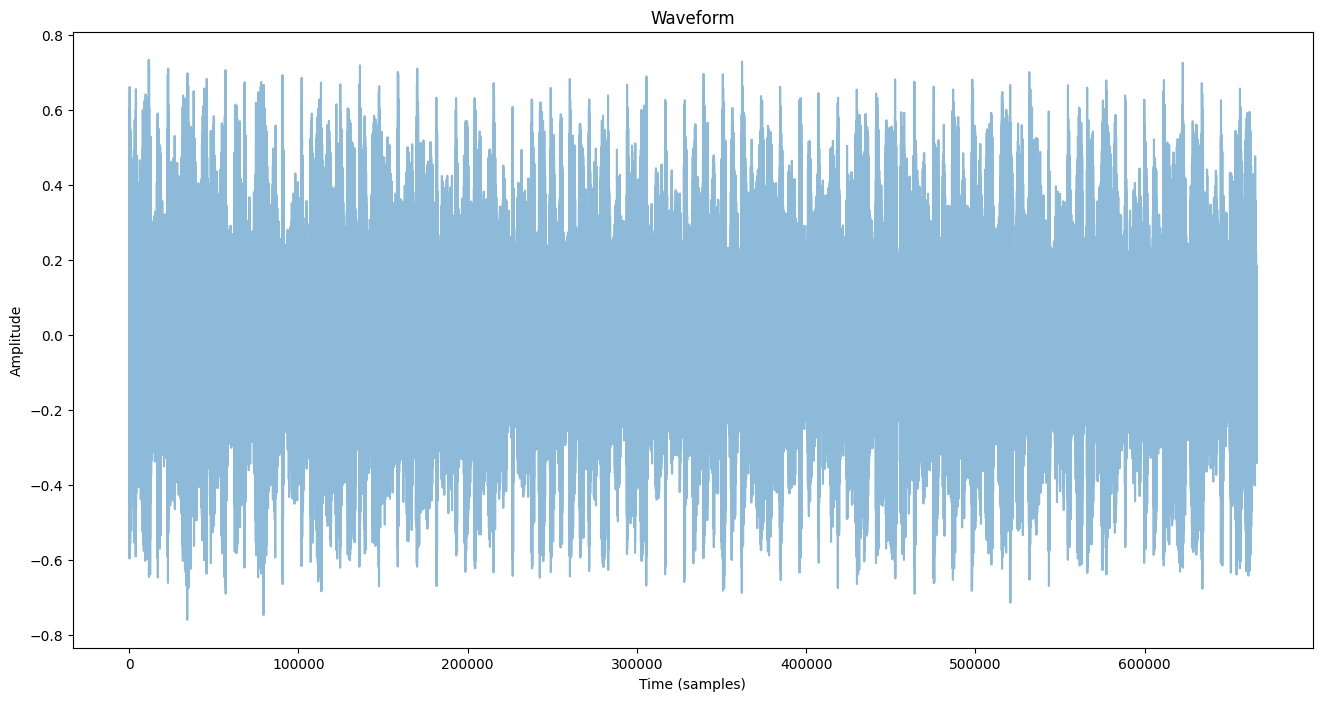

In [ ]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
plt.plot(signal, alpha=0.5)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.savefig("Waveform")


In [ ]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [ ]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [ ]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))


Text(0.5, 1.0, 'Power Spectrum')

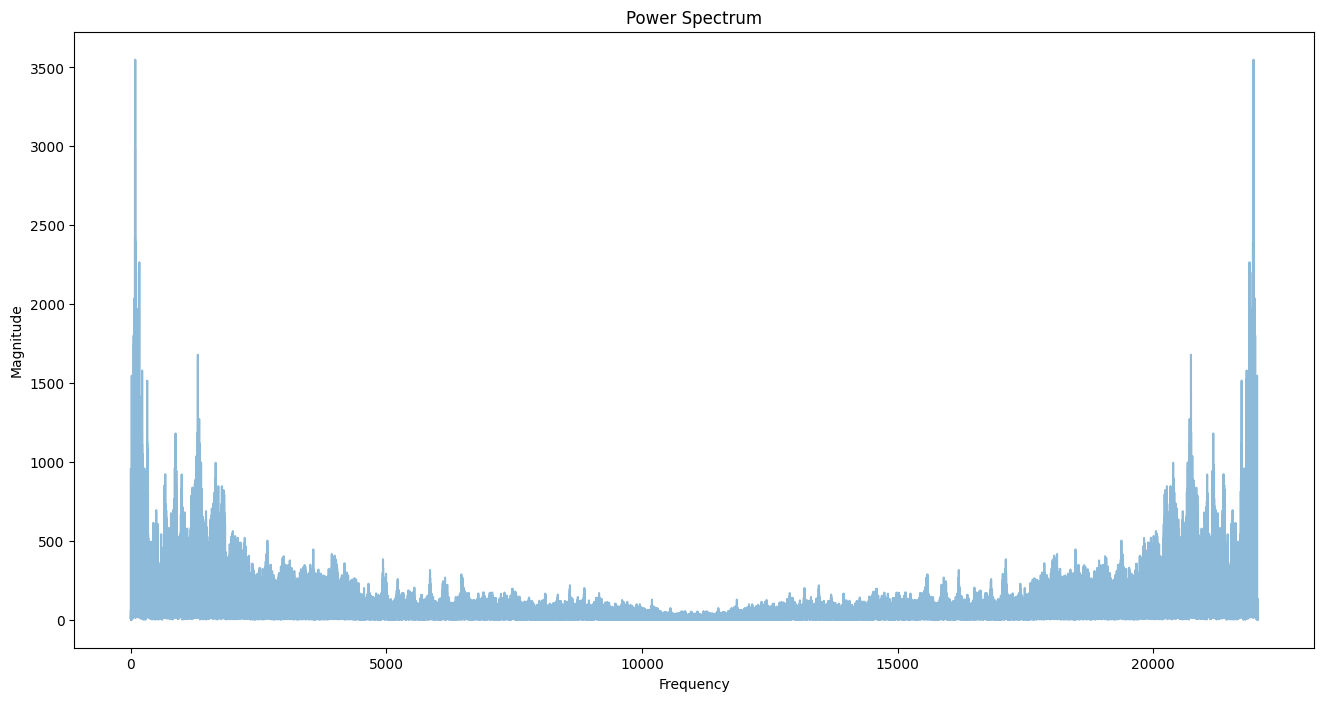

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:

# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]


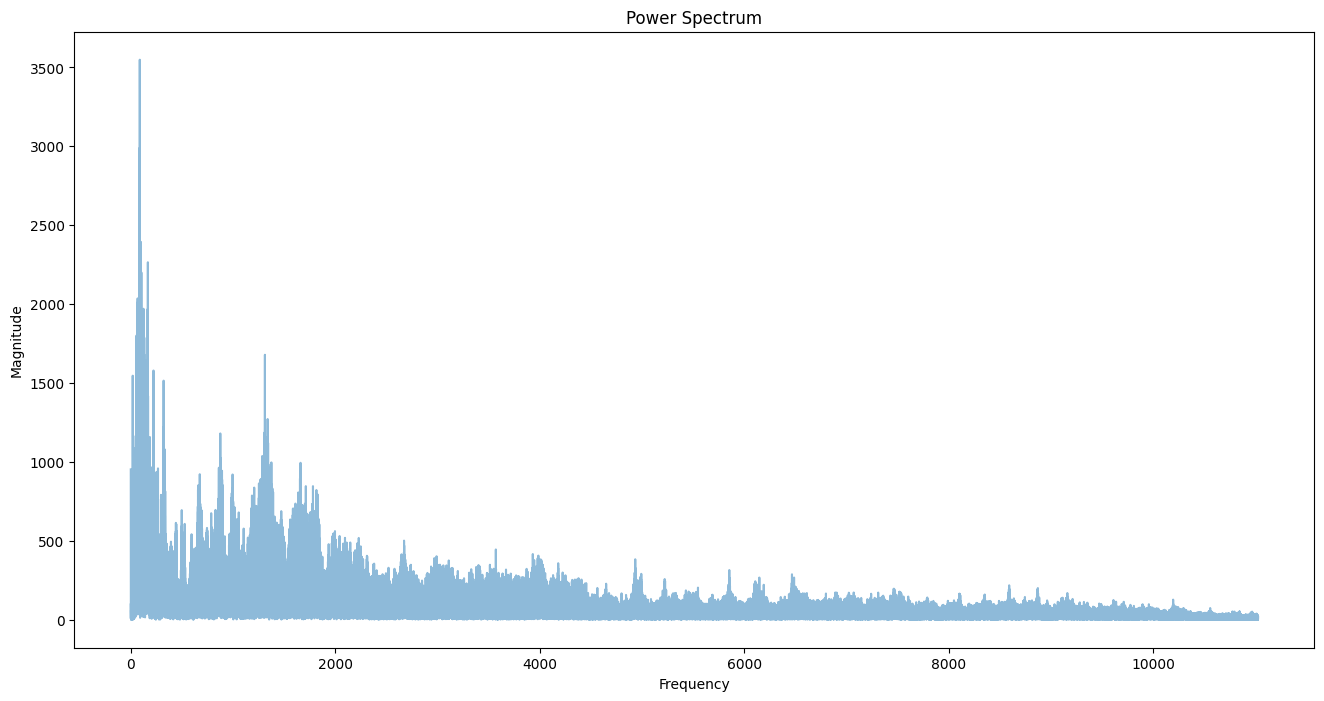

In [ ]:

# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")
plt.savefig("Power Spectrum")


In [ ]:

# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [ ]:

# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)


In [ ]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

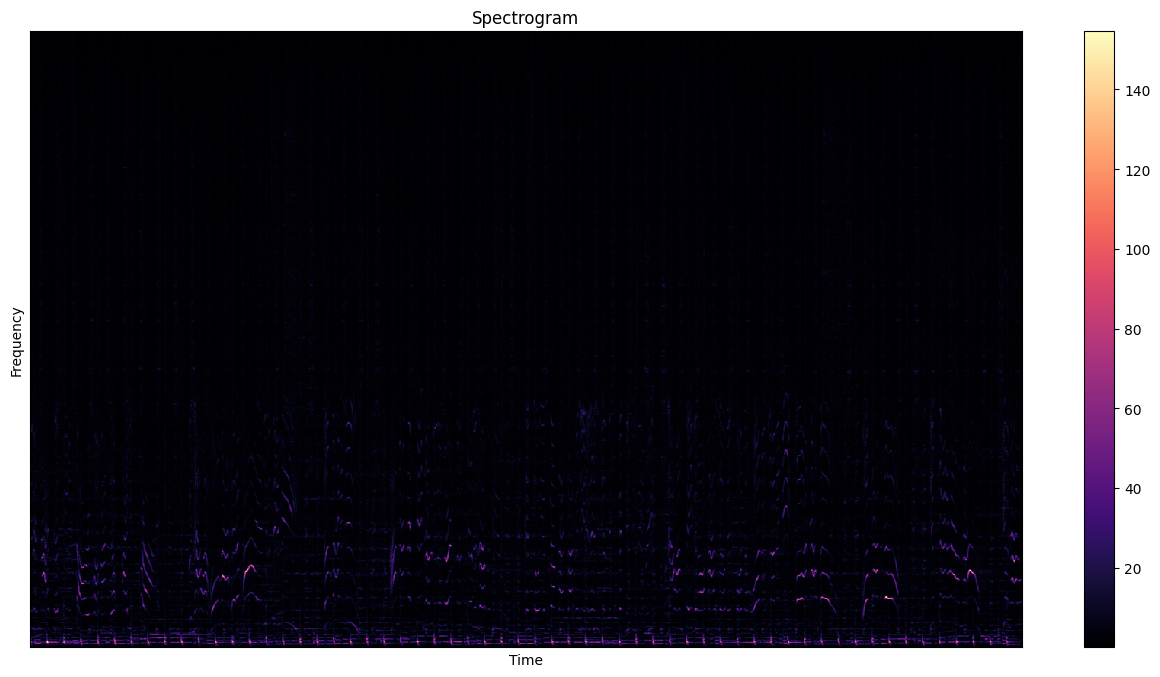

In [ ]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
plt.savefig("Spectogram")


In [ ]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

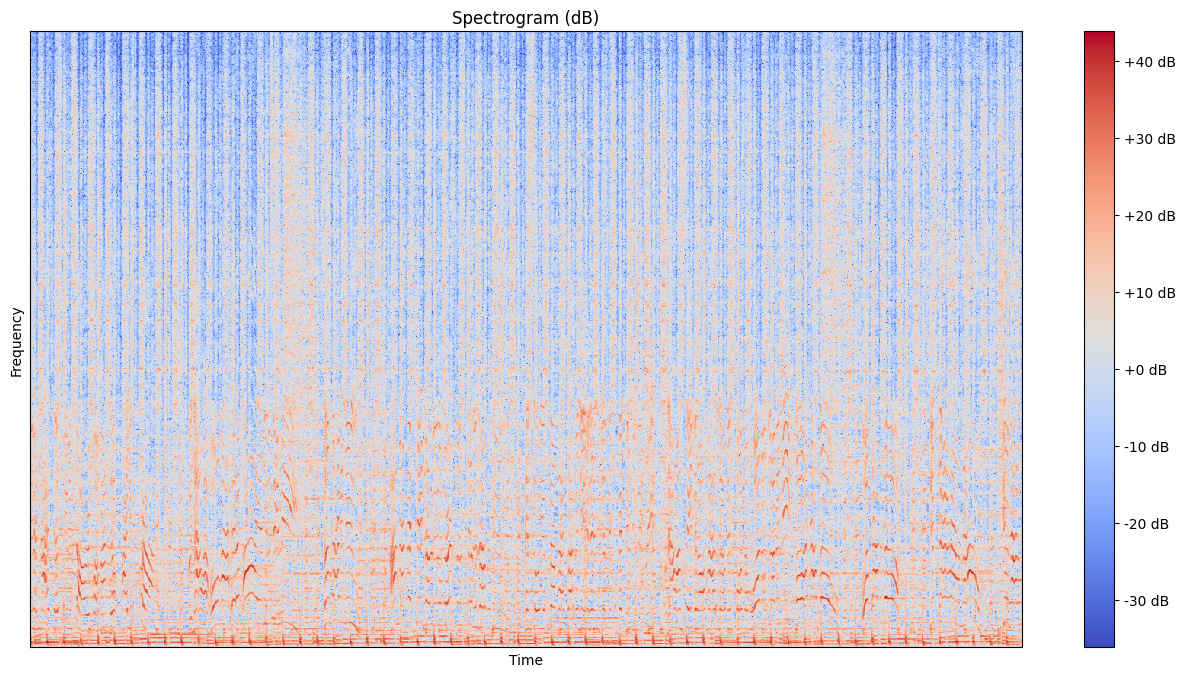

In [ ]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.savefig("Spectrogram (dB)")


In [ ]:
signal, sample_rate = librosa.load('disco.00001.wav')

# Compute MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13)


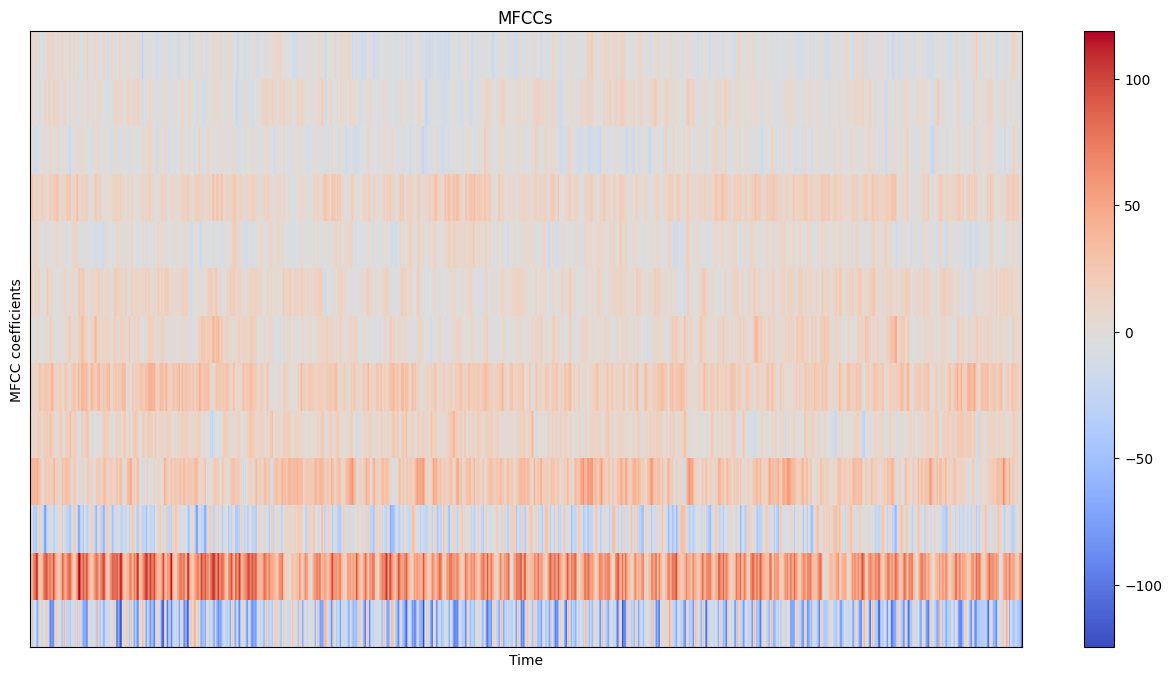

In [ ]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.savefig("MFCC")

In [ ]:
import json
import os
import math


In [ ]:

DATASET_PATH = "/content/drive/MyDrive/datasets/Data/genres_original"
JSON_PATH = "/content/drive/MyDrive/datasets/Data/genres_original/data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):
                  # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)



In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00004.wav, segment:9
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00004.wav, segment:10
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00002.wav, segment:1
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00002.wav, segment:2
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00002.wav, segment:3
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00002.wav, segment:4
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00002.wav, segment:5
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00002.wav, segment:6
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00002.wav, segment:7
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00002.wav, segment:8
/content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00002.wav, segment:9
/content/drive/MyDrive/d